# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ruben Tanoey
- **Email:** M010D4KY2276@bangkit.academy
- **ID Dicoding:** rubentanoey

## Menentukan Pertanyaan Bisnis

- If we want to give the best experience for the customers, the bike requires maintenance within a specific timeframe. Is there any specific time during the 24-hour period when bicycle sharing is least utilized?
- We need to schedule an event for the bike-sharing system. We can create an event that gives Users excitement like criterium race. During which week is bike-sharing usage decrease at its lowest point, so that we can plan the event accordingly?
[Why searching lowest point? Because usually the highest point is where people will use the bike for their own business. If the event is in the reasonably low point, there could be a chance the bike can be used for marketing!]

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Get both the data files (csv format)

In [ ]:
df_day = pd.read_csv("/content/data/day.csv")
df_hour = pd.read_csv("/content/data/hour.csv")

### Assessing Data

The first thing I'd like to check is the missing values in the dataset.

In [ ]:
print("Number of missing values in df_day\n", df_day.isnull().sum(), "\n")
print("Number of missing values in df_hour\n", df_hour.isnull().sum())

Number of missing values in df_day
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

Number of missing values in df_hour
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Then, I'd like to check the numeric descriptions of the dataset.

In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [ ]:
import pandas as pd

def detect_outliers(dataframe, threshold=1.5):
    cols = list(dataframe)
    outliers_list = []

    for column in cols:
        if column in dataframe.select_dtypes(include='number').columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - threshold * iqr
            fence_high = q3 + threshold * iqr
            num_outliers = dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]
            outliers_list.append({'Feature': column, 'Number of Outliers': num_outliers})

    outliers = pd.DataFrame(outliers_list)
    return outliers

In [ ]:
result_day = detect_outliers(df_day)
result_day

,Feature,Number of Outliers
0,instant,0
1,season,0
2,yr,0
3,mnth,0
4,holiday,21
5,weekday,0
6,workingday,0
7,weathersit,0
8,temp,0
9,atemp,0


In [ ]:
result_hour = detect_outliers(df_hour)
result_hour

,Feature,Number of Outliers
0,instant,0
1,season,0
2,yr,0
3,mnth,0
4,hr,0
5,holiday,500
6,weekday,0
7,workingday,0
8,weathersit,3
9,temp,0


We know that holiday, weathersit, humidity are in a normal range based on the description of the dataset as we get earlier. But how about the windspeed, casual, and registered? We need to check the validity of the data.

In [ ]:
df_hour_group = df_hour.groupby('dteday')['windspeed'].mean().reset_index()
df_hour_group

,dteday,windspeed
0,2011-01-01,0.160446
1,2011-01-02,0.248539
2,2011-01-03,0.248309
3,2011-01-04,0.160296
4,2011-01-05,0.186900
...,...,...
726,2012-12-27,0.350133
727,2012-12-28,0.155471
728,2012-12-29,0.124383
729,2012-12-30,0.350754


Check the windspeed in the day dataset is the same as the windspeed in the hour grouped dataset with precision 0.xxx

In [ ]:
df_day['windspeed'].round(3).equals(df_hour_group['windspeed'].round(3))

True

By this point, we can assume that the big number of windspeed is valid and could be a weather anomaly. We can make keep the data as is.

Check if sum of casual and registered is equal to cnt.

In [ ]:
df_day['casual_registered_sum'] = df_day['casual'] + df_day['registered']
print(df_day['casual_registered_sum'].equals(df_day['cnt']))

df_hour['casual_registered_sum'] = df_hour['casual'] + df_hour['registered']
print(df_hour['casual_registered_sum'].equals(df_hour['cnt']))

True
True


All the data is true! Then I can give an argument that the data is already clean and valid without removing outliers. Let's analyze the data through EDA.

## Exploratory Data Analysis (EDA)

### Explore the specific time during the 24-hour period when bicycle sharing is least utilized

Group the hour dataset by hour and get the average count of bikes rented

In [ ]:
df_hour_group = df_hour.groupby('hr')['cnt'].mean().reset_index()
df_hour_group

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


Group the day dataset into weekly and get the increase of bike-sharing usage. Then search for the highest decrease.

In [ ]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day['week'] = df_day['dteday'].dt.isocalendar().week
df_day_group = df_day.groupby('week')['cnt'].sum().reset_index()
df_day_group['increase'] = df_day_group['cnt'].diff()

df_day_group


,week,cnt,increase
0,1,34008,NaN
1,2,29291,-4717.0
2,3,27112,-2179.0
3,4,33537,6425.0
4,5,36676,3139.0
5,6,33512,-3164.0
6,7,40371,6859.0
7,8,38462,-1909.0
8,9,37934,-528.0
9,10,44230,6296.0


Get 3 highest peaks of bike-sharing usage

In [ ]:
df_day_group.nsmallest(3, 'increase')

,week,cnt,increase
46,47,44679,-16746.0
43,44,56280,-16183.0
51,52,27488,-16063.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: The bike requires maintenance within a specific timeframe. Is there any specific time during the 24-hour period when bicycle sharing is least utilized?

> Yes, there is. Based on the teal bar data, the bicycle usage is starting to increase at 6 AM and reach its peak at 5 PM. The bicycle usage is starting to decrease after 5 PM. If the bike requires maintenance, the best time to do it is between 11 PM to 5 AM.

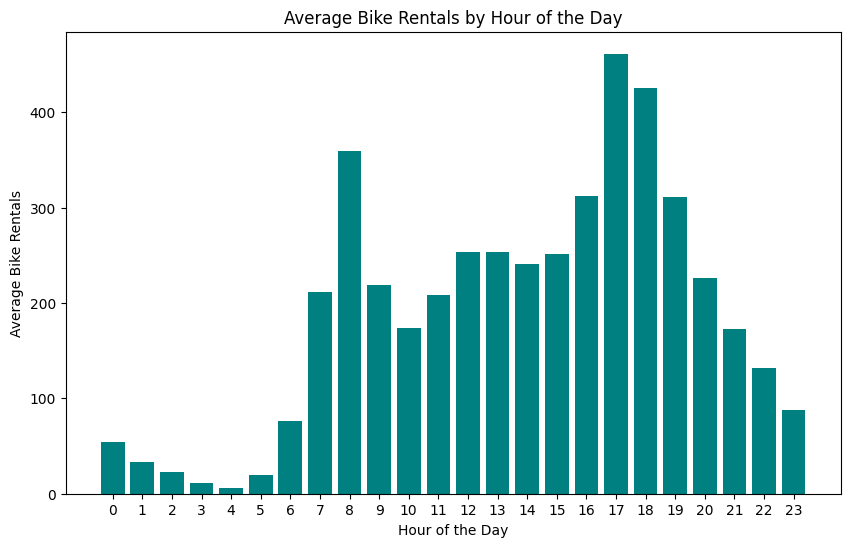

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_hour_group['hr'], df_hour_group['cnt'], color='teal')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by Hour of the Day')
plt.xticks(df_hour_group['hr'])
plt.show()

### Pertanyaan 2: We need to schedule an event for the bike-sharing system. During which week is bike-sharing usage decrease at its lowest point, so that we can plan the event accordingly?

> There are 3 lowest point of bike-sharing usage decreases, marked by the teal colored line. The first point is on the 47th week, the second point is on the 44th week, and the third point is on the 52nd week.
There also a line graph for bike-sharing usage weekly, the trends are increasing from the 1st week to the 47th week and then decreasing from the 47th week to the 52nd week.

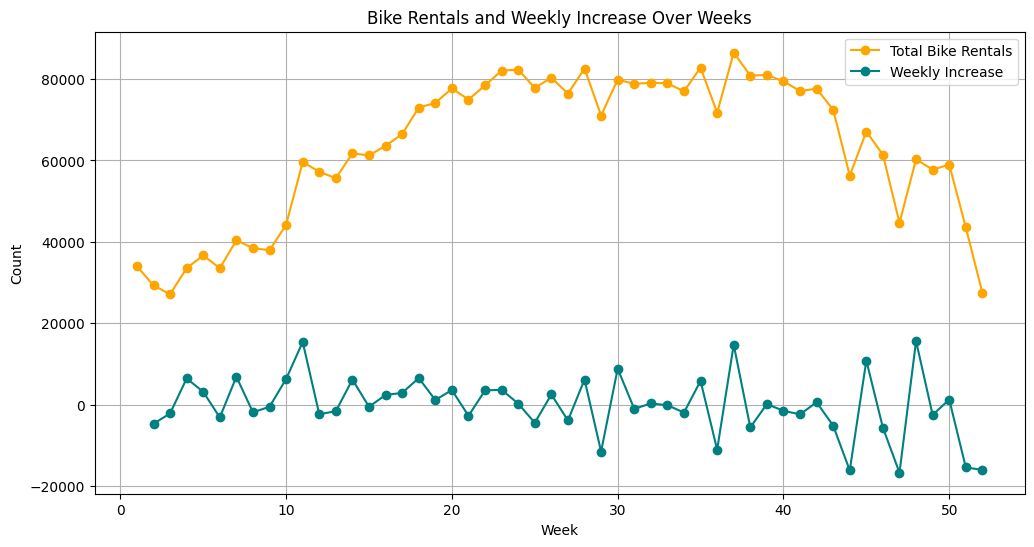

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_day_group['week'], df_day_group['cnt'], marker='o', label='Total Bike Rentals', color='orange')
plt.plot(df_day_group['week'], df_day_group['increase'], marker='o', label='Weekly Increase', color='teal')
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Bike Rentals and Weekly Increase Over Weeks')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

> - For the first question, the best time to do maintenance is between 11 PM to 5 AM. It is the time when the bicycle sharing is getting least utilized. The maintainance will keep the bicycle clean and comfortable to use, affecting the user's satisfaction.
> - For the second question, the best time to schedule an event, such as criterium race, is on the 44th week, first because it is the one of the lowest point of increase of bike-sharing usage, and second because it is still in a reasonable weather (not winter - that also makes the usage lower low).